# Association Analysis

Association analysis uses machine learning algorithms to extract hidden relationships from large datasets. We'll be using the Apriori algorithm.

The data we'll use comes from a bakery called "The Bread Basket", located in the historic center of Edinburgh. The dataset contains more than 9000 transactions from the bakery. The file contains the following columns:

- Date. Categorical variable that tells us the date of the transactions (YYYY-MM-DD format). The column includes dates from 2016-10-30 to 2017-04-09.

- Time. Categorical variable that tells us the time of the transactions (HH:MM:SS format).

- Transaction. Quantitative variable that allows us to differentiate the transactions. The rows that share the same value in this field belong to the same transaction.

- Item. Categorical variable with the products purchased.

## Part 1 - Apriori Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [2]:
%matplotlib inline

In [3]:
# reading the dataset from file
def load_dataset(file_name):
    with open(file_name, 'r') as f:
        content = f.readlines()[1:]
    transactions = []
    prev_tid = -1
    for t in content:
        t = t.strip().split(',')[-2:]
        tid = t[0]
        item = t[1]
        if prev_tid != tid:
            prev_tid = tid
            transactions.append([item])
        else:
            transactions[-1].append(item)
    return transactions

In [4]:
dataset = load_dataset('BreadBasket_DMS.csv')
# dataset is a 2D list
print("Num transactions:", len(dataset))
dataset[:10]

Num transactions: 9531


[['Bread'],
 ['Scandinavian', 'Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Medialuna', 'Pastry', 'Coffee', 'Tea'],
 ['Pastry', 'Bread'],
 ['Bread', 'Muffin'],
 ['Scandinavian', 'Medialuna']]

We will find the top 10 best-selling items in the bakery. 

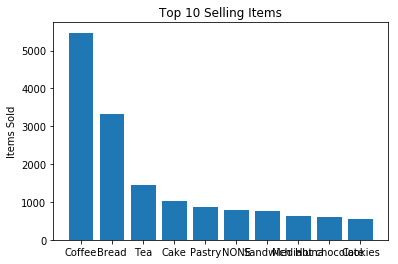

In [5]:
from collections import Counter

simple_list = []
for transaction in dataset:
    for item in transaction:
        simple_list.append(item)

occurences = Counter(simple_list).most_common(10)

x_val = [i[0] for i in occurences]
y_val = [j[1] for j in occurences]

plt.bar(np.arange(len(x_val)), y_val, align='center')
plt.xticks(np.arange(len(x_val)), x_val)
plt.ylabel('Items Sold')
plt.title('Top 10 Selling Items')

plt.show()

In [6]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
# transforming `dataset` into an array format suitable for the `mlxtend` library
te_array = te.fit(dataset).transform(dataset)

# tranforming the one-hot encoded transaction back to the item labels
first_5 = te_array[:5]
te_inverse = te.inverse_transform(first_5)
print(te_inverse)

[['Bread'], ['Scandinavian'], ['Cookies', 'Hot chocolate', 'Jam'], ['Muffin'], ['Bread', 'Coffee', 'Pastry']]


In [7]:
df = pd.DataFrame(te_array, columns=te.columns_)
df.head()

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Generating the frequent itemsets with minimum support of 1%.

In [8]:
from mlxtend.frequent_patterns import apriori

freq_itemsets = apriori(df, min_support=0.01, use_colnames=True)
freq_itemsets

,support,itemsets
0,0.036093,(Alfajores)
1,0.015948,(Baguette)
2,0.324940,(Bread)
3,0.039765,(Brownie)
4,0.103137,(Cake)
5,0.012905,(Chicken Stew)
6,0.475081,(Coffee)
7,0.019305,(Coke)
8,0.054034,(Cookies)
9,0.038926,(Farm House)


Finding all the maximal frequent itemsets along with their support fraction.

In [9]:
# subset check
freq_itemsets2 = pd.DataFrame(freq_itemsets.values[::-1], freq_itemsets.index, freq_itemsets.columns)
maximal_freq1 = pd.DataFrame().append(freq_itemsets2.iloc[0])
for index1, row1 in maximal_freq1.iterrows():
    for index2, row2 in freq_itemsets2.iterrows():
        if row2.itemsets.issubset(row1.itemsets):
            pass 
        else:
            maximal_freq1.loc[len(maximal_freq1)] = freq_itemsets2.iloc[index2]

# superset check
maximal_freq2 = pd.DataFrame(maximal_freq1.values[::-1], maximal_freq1.index, maximal_freq1.columns)
for index1, row1 in maximal_freq2.iterrows():
    for index2, row2 in maximal_freq2.iterrows():
        if row1.itemsets.issuperset(row2.itemsets) and (row1.itemsets != row2.itemsets):
            maximal_freq2.drop(index2, inplace=True)
maximal_freq2

,itemsets,support
1,(Baguette),0.015948
4,(Chicken Stew),0.0129053
5,(Coke),0.0193054
7,(Farm House),0.0389256
8,(Fudge),0.0148988
9,(Hearty & Seasonal),0.0104921
11,(Jam),0.0148988
12,(Jammie Dodgers),0.0131151
15,(Mineral water),0.0140594
18,(Salad),0.0103872


Calculating rules with a confidence level of 0.25 for the frequent itemsets generated earlier.

In [10]:
from mlxtend.frequent_patterns import association_rules

association_rules(freq_itemsets, metric="confidence", min_threshold=0.25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alfajores),(Bread),0.036093,0.324940,0.010282,0.284884,0.876728,-0.001446,0.943987
1,(Alfajores),(Coffee),0.036093,0.475081,0.019515,0.540698,1.138116,0.002368,1.142861
2,(Brownie),(Bread),0.039765,0.324940,0.010702,0.269129,0.828244,-0.002219,0.923639
3,(Bread),(Coffee),0.324940,0.475081,0.089393,0.275105,0.579069,-0.064980,0.724131
4,(Cookies),(Bread),0.054034,0.324940,0.014374,0.266019,0.818673,-0.003184,0.919725
5,(Medialuna),(Bread),0.061379,0.324940,0.016787,0.273504,0.841708,-0.003157,0.929201
6,(NONE),(Bread),0.079005,0.324940,0.020564,0.260292,0.801048,-0.005107,0.912604
7,(Pastry),(Bread),0.085510,0.324940,0.028958,0.338650,1.042194,0.001172,1.020731
8,(Brownie),(Coffee),0.039765,0.475081,0.019515,0.490765,1.033013,0.000624,1.030799
9,(Cake),(Coffee),0.103137,0.475081,0.054349,0.526958,1.109196,0.005350,1.109667


An important step in generating a set of association rules is to determine the optimal thresholds for support and confidence. If we set these values too low we will get a lot of rules and most of them will not be useful. 

When we increase the confidence level, the number of rules decreases. When there is higher confidence, there are more if-then associations that are found to be true. This means that there are fewer number of rules.

<module 'matplotlib.pyplot' from '/Users/joshua/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>


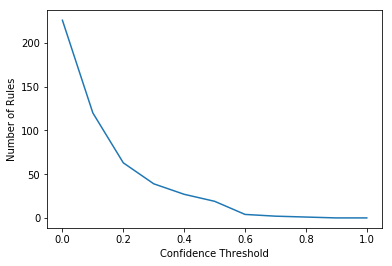

In [11]:
freq_itemsets2 = apriori(df, min_support=0.005, use_colnames=True)
rules_list = []
threshold_list = []
i = 0
while (i <= 1):
    rules = association_rules(freq_itemsets2, metric="confidence", min_threshold = i)
    rules_list.append(len(rules))
    threshold_list.append(i)
    i += 0.1
plt.plot(threshold_list, rules_list)
plt.xlabel('Confidence Threshold')
plt.ylabel('Number of Rules')
print(plt)

We choose a good balance point between confidence level and number of rules for the minimum confidence threshold, like .35. This will ensure that I have a good amount of 'if-then' associations and a good amount of confidence that those associations are true. 

In [12]:
print(association_rules(freq_itemsets2, metric="confidence", min_threshold = .35))

               antecedents consequents  antecedent support  \
0              (Alfajores)    (Coffee)            0.036093   
1                (Brownie)    (Coffee)            0.039765   
2                   (Cake)    (Coffee)            0.103137   
3           (Chicken Stew)    (Coffee)            0.012905   
4                (Cookies)    (Coffee)            0.054034   
5      (Hearty & Seasonal)    (Coffee)            0.010492   
6          (Hot chocolate)    (Coffee)            0.057916   
7         (Jammie Dodgers)    (Coffee)            0.013115   
8                  (Juice)    (Coffee)            0.038296   
9       (Keeping It Local)    (Coffee)            0.006610   
10             (Medialuna)    (Coffee)            0.061379   
11         (Mineral water)    (Coffee)            0.014059   
12                (Muffin)    (Coffee)            0.038191   
13                  (NONE)    (Coffee)            0.079005   
14                (Pastry)    (Coffee)            0.085510   
15      

The generated rules are as we expected them to be. Associations like Pastry-Bread, Sandwich-bread, and Hot chocolate-Cake were not very surprising.